In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

%matplotlib inline
%run f2forecast.py
import xlwings as xw

df=pd.read_excel("C:\Prog\ML_AI\TimeSeries\ML_AI\Time series analysis\StudConsumption\Cur\Data\Январь.xlsx")
M = [];
T = [];
W = [];
Th = [];
F = [];
Sa = [];
Su = [];


One = [];
Two = [];
Three = [];
Four = [];
Five = [];
Six = [];
Seven = [];
Eight = [];
Nine = [];
Ten = [];
Eleven = [];
Twelve = [];
Thirteen = [];
Fourteen = [];
Fifteen = [];
Sixteen = [];
Seventeen = [];
Eighteen = [];
Nineteen = [];
Twenty=[];
TwentyOne=[];
TwentyTwo = [];
TwentyThree = [];
TwentyFour =[];

WorkOrHolid = [];

def weekDay(year, month, day):
    offset = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    week   = ['Sunday', 
              'Monday', 
              'Tuesday', 
              'Wednesday', 
              'Thursday',  
              'Friday', 
              'Saturday']
    afterFeb = 1
    if month > 2: afterFeb = 0
    aux = year - 1700 - afterFeb
    # dayOfWeek for 1700/1/1 = 5, Friday
    dayOfWeek  = 5
    # partial sum of days betweem current date and 1700/1/1
    dayOfWeek += (aux + afterFeb) * 365                  
    # leap year correction    
    dayOfWeek += aux / 4 - aux / 100 + (aux + 100) / 400     
    # sum monthly and day offsets
    dayOfWeek += offset[month - 1] + (day - 1)               
    dayOfWeek %= 7
    return dayOfWeek
data=df['Data'];
for i in range(len(df["Ставка"])):
    #print(i)
    Day = weekDay(int(data[i].year), int(data[i].month), int(data[i].day));
    #print(int(Day))
    if int(Day) == 1:
        M.append(1)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 2:
        M.append(0)
        T.append(1)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 3:
        M.append(0)
        T.append(0)
        W.append(1)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 4:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(1)
        F.append(0)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 5:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(1)
        Sa.append(0)
        Su.append(0)
        WorkOrHolid.append(1)
    if int(Day) == 6:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(1)
        Su.append(0)
        WorkOrHolid.append(0)
    if int(Day) == 0:
        M.append(0)
        T.append(0)
        W.append(0)
        Th.append(0)
        F.append(0)
        Sa.append(0)
        Su.append(1)
        WorkOrHolid.append(0)
Hour=[]
flag=0;
for i in range(len(df['Ставка'])):
    Hour.append(flag);
    flag+=1;
    if(flag==24):
        flag=0
print(len(Hour))
HourInDay = {
'0' : [],
'1' : [],
'2' :[],
'3' : [],
'4' : [],
'5' : [],
'6' : [],
'7' : [],
'8' : [],
'9' : [],
'10' : [],
'11' : [],
'12':[],
'13' : [],
'14' : [],
'15' : [],
'16' : [],
'17' : [],
'18' :[],
'19' : [],
'20' :[],
'21' :[],
'22' : [],
'23' : []
#'24 ' : [];
}
for i in Hour:
    for key in HourInDay:
        #print(key,"=",i)
        if int(i) == int(key):
            #print(key)
            HourInDay[key].append(1)
        else:
             HourInDay[key].append(0)
                
Temp = df["T"]
TempSquare = [];
Trend = [];

for i in range(len(df["Ставка"])):
    TempSquare.append(Temp[i]*Temp[i]);
    Trend.append(i);


# инструментальная переменная  для ставки(Скользящее средние для ставки)
DfStav = pd.DataFrame({'Stav': df['Ставка']})


# Tail-rolling average transform
rolling = DfStav.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
#DfStav.plot()
#rolling_mean.plot(color='red')
print(len(rolling_mean))
rolling_mean["Stav"][0]=(rolling_mean["Stav"][2]+rolling_mean["Stav"][3]) / 2;
rolling_mean["Stav"][1]=(rolling_mean["Stav"][3]+rolling_mean["Stav"][4]) / 2;
Te = []
StavMon = []
NumMon = []
for i in range(len(df["T"])):
    Te.append(df["T"][i])
    StavMon.append(585820)
    NumMon.append(12)

744
          Stav
0          NaN
1          NaN
2  2413.706667
3  2414.113333
4  2412.896667
5  2415.333333
6  2416.736667
7  2423.763333
8  2426.046667
9  2427.806667
744


In [4]:
df1 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df1.fillna(0, inplace=True)

In [7]:
df2 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df2.fillna(0, inplace=True)

In [13]:
df3 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df3.fillna(0, inplace=True)

In [15]:
df4 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df4.fillna(0, inplace=True)

In [17]:
df5 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df5.fillna(0, inplace=True)

In [19]:
df6 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df6.fillna(0, inplace=True)

In [21]:
df7 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df7.fillna(0, inplace=True)

In [23]:
df8 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df8.fillna(0, inplace=True)

In [25]:
df9 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df9.fillna(0, inplace=True)

In [27]:
df10 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df10.fillna(0, inplace=True)

In [29]:
df11 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                    "Po ": df["Po "],
                   " P ":  df[" P "],
                    "Pa ": df["Pa "],
                   " U ": df[" U "],
                    "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df11.fillna(0, inplace=True)

In [31]:
df12 = pd.DataFrame({'Data': df['Data'], 
                   'Потребление':df['Потребление'] , 
                   "Ставка":df["Ставка"],
                    "Te":  Te,
                  #  "Po ": df["Po "],
                  # " P ":  df[" P "],
                  #  "Pa ": df["Pa "],
                   " U ": df[" U "],
                  #  "Ff ": df["Ff "],
                   "Рабочий/Выходной":WorkOrHolid,
                   "КвадратТемпературы":TempSquare,
                   "Тренд":Trend,
                    "СтавкаМощн":StavMon,
                    "Месяц":NumMon,
                   #"Долгота":[i for i in Long['Long']],
                   #"КвадратДолготы":[i*i for i in Long['Long']],
                   "Ставка(t-1)":[i for i in rolling_mean['Stav']],
'0':[i for i in HourInDay["0"]],
'1' :[i for i in HourInDay["1"]],
'2' :[i for i in HourInDay["2"]],
'3' :[i for i in HourInDay["3"]],
'4' :[i for i in HourInDay["4"]],
'5' :[i for i in HourInDay["5"]],
'6' :[i for i in HourInDay["6"]],
'7' :[i for i in HourInDay["7"]],
'8' :[i for i in HourInDay["8"]],
'9' :[i for i in HourInDay["9"]],
'10' :[i for i in HourInDay["10"]],
'11' :[i for i in HourInDay["11"]],
'12' :[i for i in HourInDay["12"]],
'13' :[i for i in HourInDay["13"]],
'14' :[i for i in HourInDay["14"]],
'15' :[i for i in HourInDay["15"]],
'16' :[i for i in HourInDay["16"]],
'17' :[i for i in HourInDay["17"]],
'18' :[i for i in HourInDay["18"]],
'19' :[i for i in HourInDay["19"]],
'20' :[i for i in HourInDay["20"]],
'21' :[i for i in HourInDay["21"]],
'22' :[i for i in HourInDay["22"]],
'23' :[i for i in HourInDay["23"]],
'M':M,
'T':T,
'W':W,
'Th':Th,
'F':F,
'Sa':Sa,
'Su':Su
                  })
df12.fillna(0, inplace=True)

In [32]:
DF = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],ignore_index=True)

In [33]:
DF

,Data,Потребление,Ставка,Te,Po,P,Pa,U,Ff,Рабочий/Выходной,...,21,22,23,M,T,W,Th,F,Sa,Su
0,2017-01-01 00:00:00,19.104,2415.47,-19.8,725.4,772.4,-0.4,85,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017-01-01 01:00:00,18.552,2414.11,-19.8,725.4,772.4,-0.4,85,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017-01-01 02:00:00,17.256,2411.54,-19.8,725.4,772.4,-0.4,85,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2017-01-01 03:00:00,20.472,2416.69,-20.8,725.1,772.3,-0.3,83,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2017-01-01 04:00:00,20.448,2410.46,-20.8,725.1,772.3,-0.3,83,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,24.360,2136.83,-15.6,731.0,777.6,2.2,85,2,0,...,0,0,0,0,0,0,0,0,0,1
8756,2017-12-31 20:00:00,24.408,2136.75,-15.6,731.0,777.6,2.2,85,2,0,...,0,0,0,0,0,0,0,0,0,1
8757,2017-12-31 21:00:00,23.424,2133.90,-14.4,732.3,778.7,1.3,86,2,0,...,1,0,0,0,0,0,0,0,0,1
8758,2017-12-31 22:00:00,19.920,2128.15,-14.4,732.3,778.7,1.3,86,2,0,...,0,1,0,0,0,0,0,0,0,1


In [34]:
DF.to_excel("Год.xlsx")  

In [97]:
for i in range(744):
    DF['СтавкаМощн'][i] = 585820 

In [98]:
DF.to_excel("Год.xlsx") 

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

%matplotlib inline
%run f2forecast.py
import xlwings as xw

In [3]:
df=pd.read_excel("ГодСветИсправл.xlsx")

In [6]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Data', 'Потребление', 'Ставка', 'Te',
       'Po ', ' P ', 'Pa ', ' U ', 'Ff ', 'Рабочий/Выходной',
       'КвадратТемпературы', 'Тренд', 'СтавкаМощн', 'Месяц', 'Ставка(t-1)',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M',
       'T', 'W', 'Th', 'F', 'Sa', 'Su', 'Sunrise', 'Sunset', 'Daylength'],
      dtype='object')

In [7]:
df

,Unnamed: 0,Unnamed: 0.1,Data,Потребление,Ставка,Te,Po,P,Pa,U,...,M,T,W,Th,F,Sa,Su,Sunrise,Sunset,Daylength
0,0,0,2017-01-01 00:00:00,19.104,2415.47,-19.8,725.4,772.4,-0.4,85,...,0,0,0,0,0,1,0,9.12,17.00,7.48
1,1,1,2017-01-01 01:00:00,18.552,2414.11,-19.8,725.4,772.4,-0.4,85,...,0,0,0,0,0,1,0,9.12,17.02,7.50
2,2,2,2017-01-01 02:00:00,17.256,2411.54,-19.8,725.4,772.4,-0.4,85,...,0,0,0,0,0,1,0,9.12,17.03,7.51
3,3,3,2017-01-01 03:00:00,20.472,2416.69,-20.8,725.1,772.3,-0.3,83,...,0,0,0,0,0,1,0,9.11,17.04,7.52
4,4,4,2017-01-01 04:00:00,20.448,2410.46,-20.8,725.1,772.3,-0.3,83,...,0,0,0,0,0,1,0,9.11,17.05,7.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,8755,2017-12-31 19:00:00,24.360,2136.83,-15.6,731.0,777.6,2.2,85,...,0,0,0,0,0,0,1,9.00,17.28,8.28
8756,8756,8756,2017-12-31 20:00:00,24.408,2136.75,-15.6,731.0,777.6,2.2,85,...,0,0,0,0,0,0,1,8.59,17.29,8.31
8757,8757,8757,2017-12-31 21:00:00,23.424,2133.90,-14.4,732.3,778.7,1.3,86,...,0,0,0,0,0,0,1,8.57,17.31,8.34
8758,8758,8758,2017-12-31 22:00:00,19.920,2128.15,-14.4,732.3,778.7,1.3,86,...,0,0,0,0,0,0,1,8.56,17.33,8.37


In [8]:
df2 = pd.read_csv("SunCal.csv")

In [9]:
df2.columns

Index(['Date', ' "Sunrise"', ' "Sunset"', ' "Daylength"'], dtype='object')

In [10]:
df2[' "Sunrise"'][0]

' "09:12"'

In [11]:
sun_rise = []
sun_set = []
day_length = []
for i in range(365):
    for z in range(24):
        sun_rise.append(df2[' "Sunrise"'][i])
        sun_set.append(df2[' "Sunset"'][i])
        day_length.append(df2[' "Daylength"'][i])


In [12]:
for i in range(len(sun_rise)):
    sun_rise[i] = float(sun_rise[i].replace(':', '.').replace('"', '').replace(' ', ''))
    sun_set[i] = float(sun_set[i].replace(':', '.').replace('"', '').replace(' ', ''))
    day_length[i] = float(day_length[i].replace(':', '.').replace('"', '').replace(' ', ''))
print(sun_rise[0])


9.12


In [14]:
print(len(sun_rise))

8760


In [15]:
df["Sunrise"] = sun_rise   
df["Sunset"] = sun_set  
df["Daylength"] = day_length 

In [16]:
for i in range(744):
    df['СтавкаМощн'][i] = 585820 

In [17]:

df.to_excel("ГодСветИсправл.xlsx") 

In [18]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Data', 'Потребление', 'Ставка', 'Te',
       'Po ', ' P ', 'Pa ', ' U ', 'Ff ', 'Рабочий/Выходной',
       'КвадратТемпературы', 'Тренд', 'СтавкаМощн', 'Месяц', 'Ставка(t-1)',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M',
       'T', 'W', 'Th', 'F', 'Sa', 'Su', 'Sunrise', 'Sunset', 'Daylength'],
      dtype='object')

In [46]:
z=['Data', 'Потребление', 
     'Ставка', 'Te', #'Po ', ' P ','Pa ','Ff '
     ' U ', 'Рабочий/Выходной', 'КвадратТемпературы', 'Тренд',
       'СтавкаМощн', 'Месяц', 'Ставка(t-1)', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', 'M', 'T', 'W', 'Th', 'F', 'Sa', 'Su',
       'Sunrise', 'Sunset', 'Daylength']
df3=df[z]

In [20]:
df3.columns

Index(['Data', 'Потребление', 'Ставка', 'Te', ' U ', 'Рабочий/Выходной',
       'КвадратТемпературы', 'Тренд', 'СтавкаМощн', 'Месяц', 'Ставка(t-1)',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'M',
       'T', 'W', 'Th', 'F', 'Sa', 'Su', 'Sunrise', 'Sunset', 'Daylength'],
      dtype='object')

In [26]:
df3

,Data,Потребление,Ставка,Te,U,Рабочий/Выходной,КвадратТемпературы,Тренд,СтавкаМощн,Месяц,...,M,T,W,Th,F,Sa,Su,Sunrise,Sunset,Daylength
0,2017-01-01 00:00:00,19.104,2415.47,-19.8,85,0,392.04,0,585820,1,...,0,0,0,0,0,1,0,9.12,17.00,7.48
1,2017-01-01 01:00:00,18.552,2414.11,-19.8,85,0,392.04,1,585820,1,...,0,0,0,0,0,1,0,9.12,17.00,7.48
2,2017-01-01 02:00:00,17.256,2411.54,-19.8,85,0,392.04,2,585820,1,...,0,0,0,0,0,1,0,9.12,17.00,7.48
3,2017-01-01 03:00:00,20.472,2416.69,-20.8,83,0,432.64,3,585820,1,...,0,0,0,0,0,1,0,9.12,17.00,7.48
4,2017-01-01 04:00:00,20.448,2410.46,-20.8,83,0,432.64,4,585820,1,...,0,0,0,0,0,1,0,9.12,17.00,7.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,24.360,2136.83,-15.6,85,0,243.36,739,639089,12,...,0,0,0,0,0,0,1,9.12,16.59,7.47
8756,2017-12-31 20:00:00,24.408,2136.75,-15.6,85,0,243.36,740,639089,12,...,0,0,0,0,0,0,1,9.12,16.59,7.47
8757,2017-12-31 21:00:00,23.424,2133.90,-14.4,86,0,207.36,741,639089,12,...,0,0,0,0,0,0,1,9.12,16.59,7.47
8758,2017-12-31 22:00:00,19.920,2128.15,-14.4,86,0,207.36,742,639089,12,...,0,0,0,0,0,0,1,9.12,16.59,7.47


In [21]:
col=[#'Data', 'Потребление', 
     'Ставка', 'Te', #'Po ', ' P ','Pa ','Ff '
     ' U ', 'Рабочий/Выходной', 'КвадратТемпературы', 'Тренд',
       'СтавкаМощн', 'Месяц', 'Ставка(t-1)', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', 'M', 'T', 'W', 'Th', 'F', 'Sa', 'Su',
       'Sunrise', 'Sunset', 'Daylength']
#Разделим на влияющие и целевую переменную
X=df[col]
Y=df['Потребление']
X=sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Потребление   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     920.5
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:52:20   Log-Likelihood:                -23952.
No. Observations:                8760   AIC:                         4.799e+04
Df Residuals:                    8719   BIC:                         4.828e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 31.5669      1

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import string as string
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
inputdf = df.filter(items=[#'Data', 
    'Потребление',  'Ставка', 'Te', #'Po ', ' P ','Pa ','Ff '
     ' U ', 'Рабочий/Выходной', 'КвадратТемпературы', 'Тренд',
       'СтавкаМощн', 'Месяц', 'Ставка(t-1)', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '20', '21', '22', '23', 'M', 'T', 'W', 'Th', 'F', 'Sa', 'Su',
       'Sunrise', 'Sunset', 'Daylength'])
features=inputdf
type(features)
#features.iloc[:,5:].head(5)
#features.head(5)
#features.info()
#features.columns
# Метки - это значения, которые мы хотим предсказать
labels = np.array(features['Потребление'])
# Удалить ярлыки из функций
# ось 1 относится к столбцам
features= features.drop('Потребление', axis = 1)
# Сохранение имен объектов для последующего использования
feature_list = list(features.columns)
# Преобразовать в массив NumPy
features = np.array(features)
# Использование Scikit-learn для разделения данных на обучающие и тестовые наборы
from sklearn.model_selection import train_test_split
# Разделить данные на обучающие и тестовые наборы
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 100)

print('Форма признаков обучения:', train_features.shape)
print('Форма меток обучения:', train_labels.shape)
print('Форма признаков тестирования:', test_features.shape)
print('Форма меток тестирования:', test_labels.shape)

Форма признаков обучения: (6570, 43)
Форма меток обучения: (6570,)
Форма признаков тестирования: (2190, 43)
Форма меток тестирования: (2190,)


In [23]:
# Импортируем используемую модель
from sklearn.ensemble import RandomForestRegressor
# Создание модели с 100 деревьями решений
#rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
rf = RandomForestRegressor(n_estimators = 100, random_state = 100)
# Обучаем модель по выборки обучения
rf.fit(train_features, train_labels);

# Используйте метод прогнозирования леса на тестовых данных
predictions = rf.predict(test_features)
# Рассчитать абсолютные ошибки
errors = abs(predictions - test_labels)
# Вывести среднюю абсолютную ошибку (мАе)
print('Средняя абсолютная ошибка:', round(np.mean(errors), 2), 'кВт.')


# Рассчитать среднюю абсолютную процентную ошибку (MAPE)
mape = 100 * (errors / test_labels)
# Расчет и отображение точности
accuracy = 100 - np.mean(mape)
print('Точность:', round(accuracy, 2), '%.')
# Импорт инструментов, необходимых для визуализации
from sklearn.tree import export_graphviz
#import pydot
# Вытащи одно дерево из леса
tree = rf.estimators_[5]

# Получить числовые значения функций
importances = list(rf.feature_importances_)
# Список кортежей с переменной и важностью
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Сортировать значения функций по наиболее важным
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Распечатать функцию и значение
[print('Переменные: {:20} Важность: {}'.format(*pair)) for pair in feature_importances];

Средняя абсолютная ошибка: 1.89 кВт.
Точность: 91.81 %.
Переменные: Sunset               Важность: 0.3
Переменные: Te                   Важность: 0.14
Переменные:  U                   Важность: 0.07
Переменные: КвадратТемпературы   Важность: 0.04
Переменные: 15                   Важность: 0.04
Переменные: 16                   Важность: 0.04
Переменные: Daylength            Важность: 0.04
Переменные: СтавкаМощн           Важность: 0.03
Переменные: 14                   Важность: 0.03
Переменные: 17                   Важность: 0.03
Переменные: Ставка               Важность: 0.02
Переменные: Тренд                Важность: 0.02
Переменные: Ставка(t-1)          Важность: 0.02
Переменные: 0                    Важность: 0.02
Переменные: 13                   Важность: 0.02
Переменные: 22                   Важность: 0.02
Переменные: 23                   Важность: 0.02
Переменные: Sunrise              Важность: 0.02
Переменные: Месяц                Важность: 0.01
Переменные: 1                    

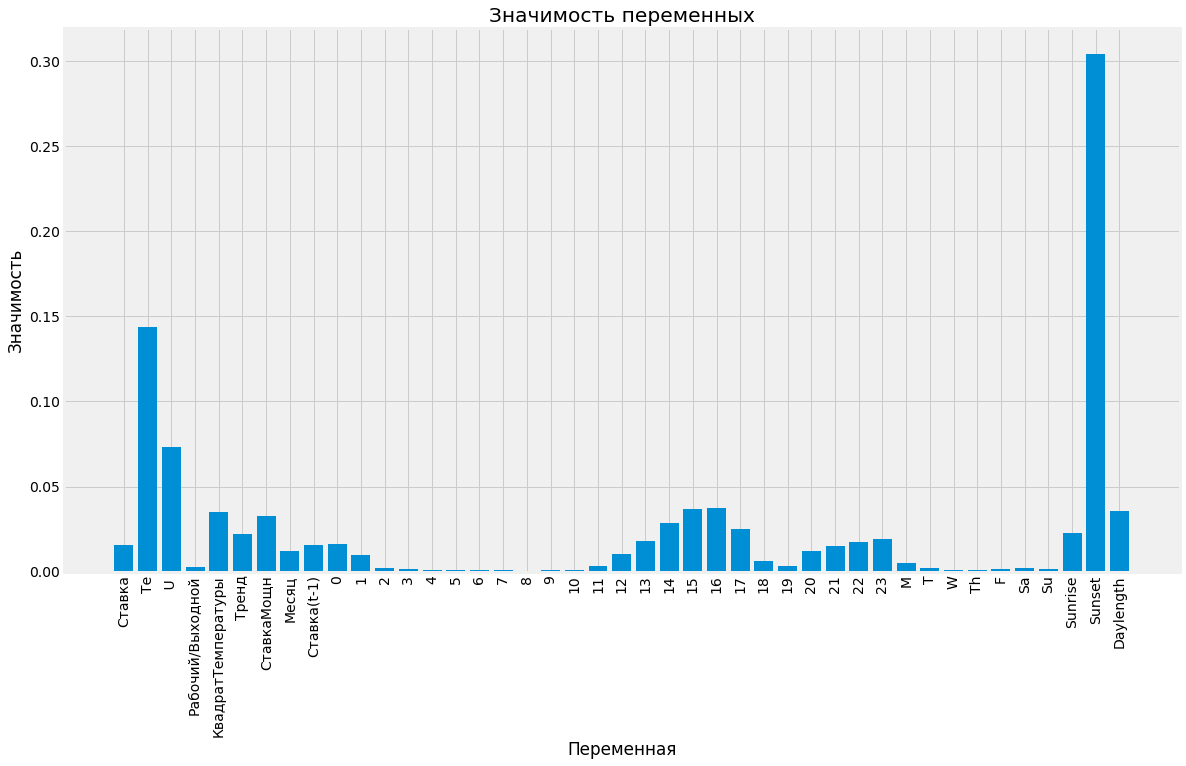

In [24]:
#%matplotlib inline
# Установить стиль
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Сделать гистограмму
plt.bar(x_values, importances, orientation = 'vertical')
# Галочки меток для оси x
plt.xticks(x_values, feature_list, rotation='vertical')
# Оси метки и заголовок
plt.ylabel('Значимость'); plt.xlabel('Переменная'); plt.title('Значимость переменных');
plt.show()

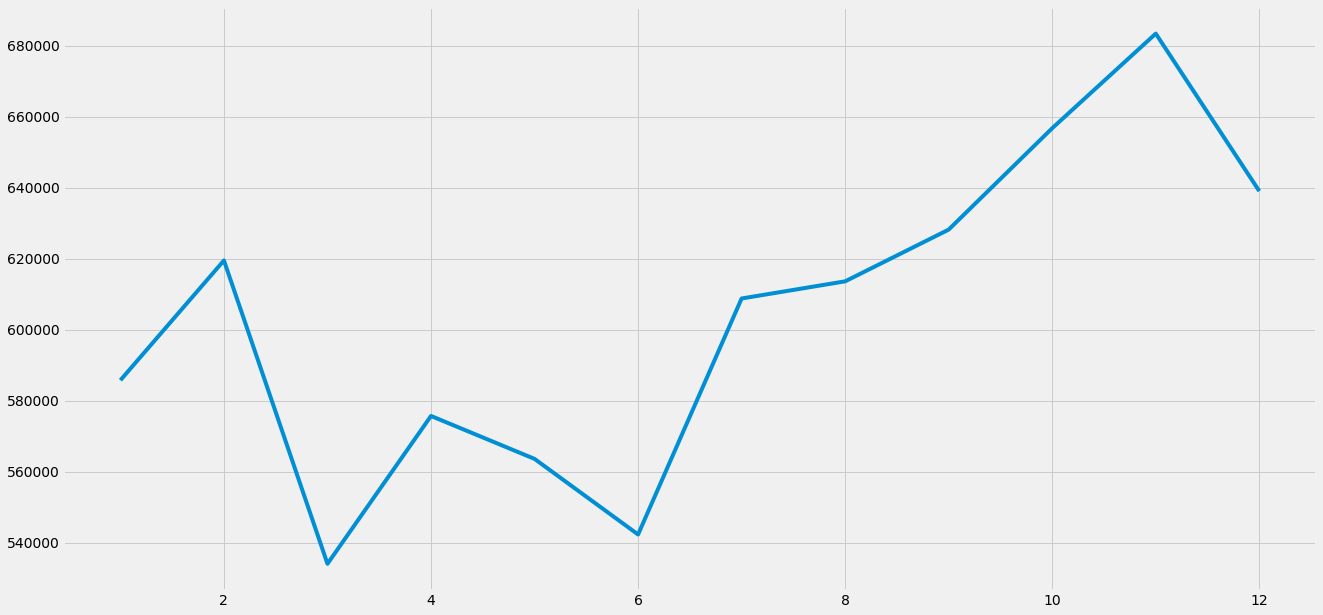

In [25]:
#График зависимости месяц/моoность
plt.figure(figsize=(20,10))
plt.plot(df["Месяц"],df["СтавкаМощн"])



Text(0.5, 0.98, 'Адитивная модель')

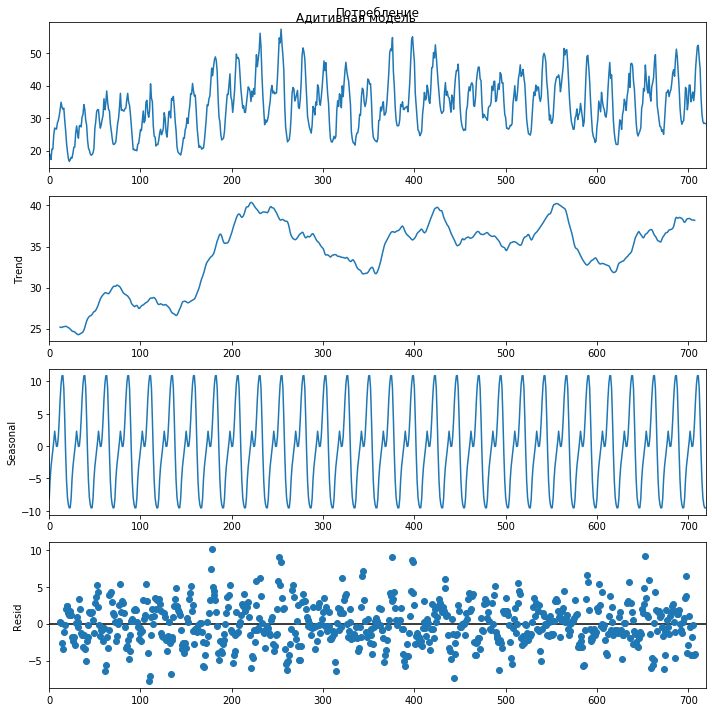

In [12]:
# Decompose 
result_A = seasonal_decompose(df['Потребление'][0:720], model='additive', freq=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')

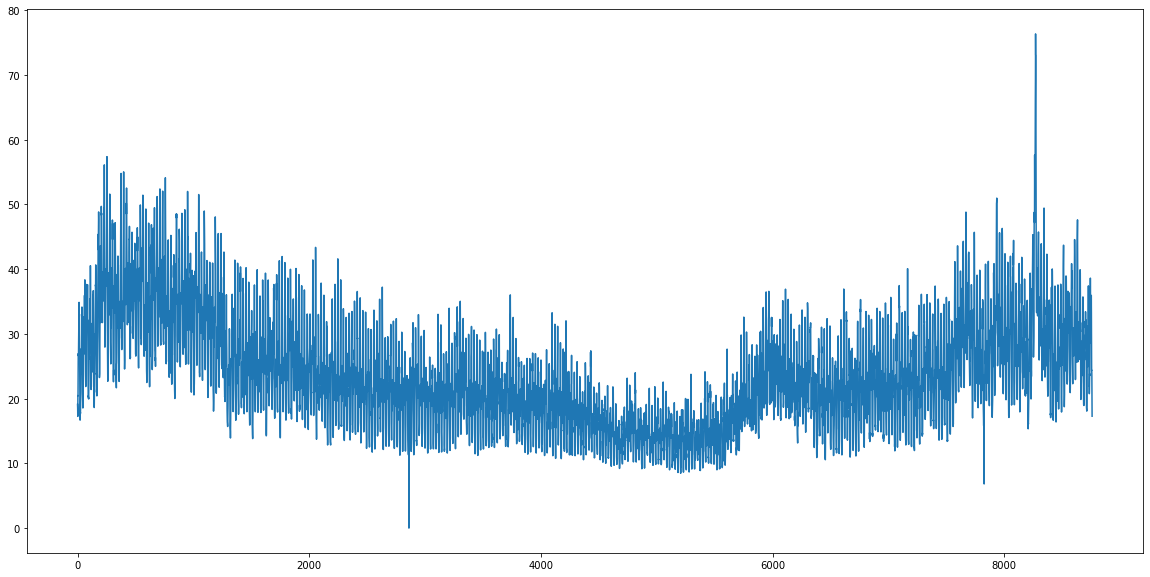

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df["Потребление"])

In [14]:
df["Потребление"].describe()

count    8760.000000
mean       23.362416
std         8.515636
min         0.000000
25%        16.992000
50%        21.984000
75%        28.398000
max        76.344000
Name: Потребление, dtype: float64

In [20]:
# {ХольтВинтерс}
train=df["Потребление"][0:6570]
train.head()

0    19.104
1    18.552
2    17.256
3    20.472
4    20.448
Name: Потребление, dtype: float64

In [21]:
test=df["Потребление"][6570:8760]
test.head()

6570    22.512
6571    19.584
6572    16.824
6573    12.168
6574    11.592
Name: Потребление, dtype: float64

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [43]:
fit1 = ExponentialSmoothing(df["Потребление"][0:2160], seasonal_periods=24, trend='add', seasonal='mul').fit()

In [44]:
fit1.forecast(72)
fit1.params

{'smoothing_level': 0.7502498650895159,
 'smoothing_slope': 6.846631998910483e-21,
 'smoothing_seasonal': 0.0756595379126385,
 'damping_slope': nan,
 'initial_level': 22.82615059513611,
 'initial_slope': 0.05294227765605492,
 'initial_seasons': array([0.81762835, 0.87512304, 0.89150929, 0.92676038, 0.94642207,
        0.94957484, 1.02876765, 0.99220904, 0.95639073, 0.95948932,
        1.0564002 , 1.16139322, 1.25194211, 1.31226299, 1.31504452,
        1.30524667, 1.24140185, 1.09764276, 0.94912526, 0.83466882,
        0.77080488, 0.7514131 , 0.74401387, 0.76293987]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [42]:
errors = abs(fit1.forecast(72) - df["Потребление"][2160:2232])
# Рассчитать среднюю абсолютную процентную ошибку (MAPE)
mape = 100 * (errors / df["Потребление"][2160:2232])
# Расчет и отображение точности
accuracy = 100 - np.mean(mape)
print('Точность:', round(accuracy, 2), '%.')

Точность: 89.28 %.


In [39]:
fit1.fittedvalues

0       18.706595
1       20.387471
2       19.413568
3       18.547542
4       20.465599
          ...    
2155    21.899013
2156    18.166817
2157    15.764921
2158    14.656849
2159    13.955810
Length: 2160, dtype: float64

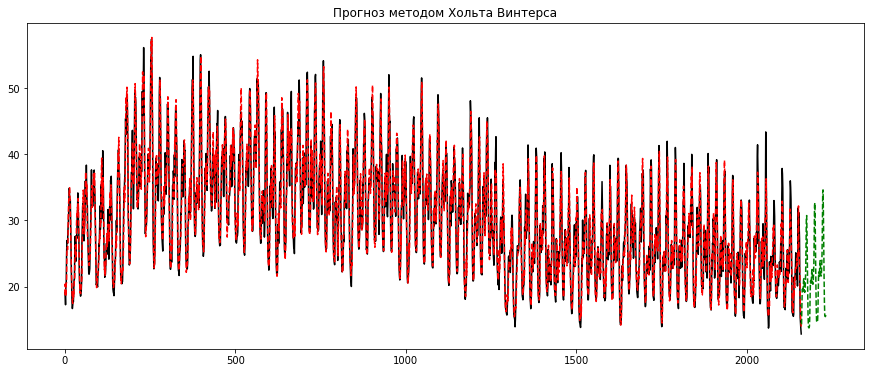

In [41]:
ax = df["Потребление"][0:2160].plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(72).plot(ax=ax, style='--', color='green')


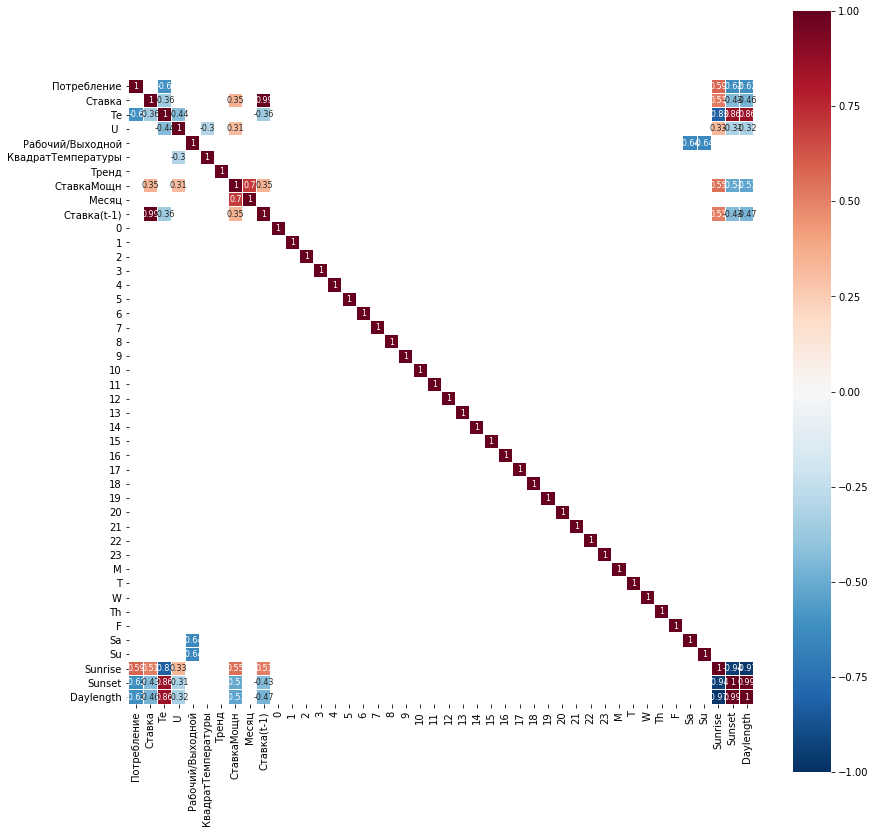

In [47]:
h_map(df3, 0.3)